In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cuff
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cuff.go_offline()
import plotly.express as px

sales=pd.read_csv(r"C:\Users\nirbh\OneDrive\Documents\sales15.csv")

About Dataset
Dataset of a Online Sales in USA is about the sales of different products, several merchandise and electronic in different states. Since a huge chunk of the people who have access to internet is switching to online shopping, large retailers are actively searching for ways to increase their profit. Sales analysis is one such key techniques used by large retailers to to increase sales by understanding the customers' purchasing behavior & patterns. Market basket analysis examines collections of items to find relationships between items that go together within the business context.
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!

In [2]:
# sales=sales.dropna()
sales = sales.drop_duplicates()

In [3]:
sales.shape

(15319, 36)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15319 entries, 0 to 15318
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          15319 non-null  int64  
 1   order_date        15319 non-null  object 
 2   status            15319 non-null  object 
 3   item_id           15319 non-null  int64  
 4   sku               15319 non-null  object 
 5   qty_ordered       15319 non-null  int64  
 6   price             15319 non-null  float64
 7   value             15319 non-null  float64
 8   discount_amount   15319 non-null  float64
 9   total             15319 non-null  float64
 10  category          15319 non-null  object 
 11  payment_method    15319 non-null  object 
 12  bi_st             15319 non-null  object 
 13  cust_id           15319 non-null  int64  
 14  year              15319 non-null  int64  
 15  month             15319 non-null  object 
 16  ref_num           15319 non-null  int64 

In [5]:
sales.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01-10-2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01-10-2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13-11-2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [6]:
sales.tail()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
15314,100360890,31-10-2020,canceled,585531,ENTVIZ59BF507F7422C,2,1833.5,1833.5,200.0,1633.5,...,339-11-3089,210-400-4497,Dallas,Dallas,Dallas,TX,75285,South,aoolmstead,10.908099
15315,100360892,31-10-2020,canceled,585533,ENTVIZ59BF507F7422C,2,1833.5,1833.5,0.0,1833.5,...,339-11-3089,210-400-4497,Dallas,Dallas,Dallas,TX,75285,South,aoolmstead,0.000000
15316,100360933,31-10-2020,canceled,585581,KABPLA59AD924A377F4,2,229.1,229.1,0.0,229.1,...,339-11-3089,210-400-4497,Dallas,Dallas,Dallas,TX,75285,South,aoolmstead,0.000000
15317,100360954,31-10-2020,order_refunded,585608,COMHP59C8D1C761750,3,104.9,209.8,0.0,209.8,...,339-11-3089,210-400-4497,Dallas,Dallas,Dallas,TX,75285,South,aoolmstead,0.000000
15318,100360956,31-10-2020,canceled,585610,ENTVIZ59BF507F7422C,2,1833.5,1833.5,0.0,1833.5,...,339-11-3089,210-400-4497,Dallas,Dallas,Dallas,TX,75285,South,aoolmstead,0.000000


In [7]:
sales_bckup=sales
sales = sales.drop(['order_date','order_id','item_id','sku','cust_id','ref_num','Name Prefix', 'First Name', 'Middle Initial',
       'Last Name','full_name', 'E Mail', 'Customer Since', 'SSN',
       'Phone No. ', 'Place Name','User Name','order_date','bi_st','discount_amount'],axis =1)

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15319 entries, 0 to 15318
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status            15319 non-null  object 
 1   qty_ordered       15319 non-null  int64  
 2   price             15319 non-null  float64
 3   value             15319 non-null  float64
 4   total             15319 non-null  float64
 5   category          15319 non-null  object 
 6   payment_method    15319 non-null  object 
 7   year              15319 non-null  int64  
 8   month             15319 non-null  object 
 9   Gender            15319 non-null  object 
 10  age               15319 non-null  int64  
 11  County            15319 non-null  object 
 12  City              15319 non-null  object 
 13  State             15319 non-null  object 
 14  Zip               15319 non-null  int64  
 15  Region            15319 non-null  object 
 16  Discount_Percent  15319 non-null  float6

In [9]:
sales.isnull().sum()

status              0
qty_ordered         0
price               0
value               0
total               0
category            0
payment_method      0
year                0
month               0
Gender              0
age                 0
County              0
City                0
State               0
Zip                 0
Region              0
Discount_Percent    0
dtype: int64

# Visualization (EDA)

In [10]:
sales.head()

,status,qty_ordered,price,value,total,category,payment_method,year,month,Gender,age,County,City,State,Zip,Region,Discount_Percent
0,received,21,89.9,1798.0,1798.0,Men's Fashion,cod,2020,Oct-20,F,43,Harmon,Vinson,OK,73571,South,0.0
1,received,11,19.0,190.0,190.0,Men's Fashion,cod,2020,Oct-20,F,43,Harmon,Vinson,OK,73571,South,0.0
2,complete,9,149.9,1199.2,1199.2,Men's Fashion,cod,2020,Oct-20,F,43,Harmon,Vinson,OK,73571,South,0.0
3,complete,9,79.9,639.2,639.2,Men's Fashion,cod,2020,Oct-20,F,43,Harmon,Vinson,OK,73571,South,0.0
4,received,2,99.9,99.9,99.9,Men's Fashion,cod,2020,Nov-20,F,43,Harmon,Vinson,OK,73571,South,0.0


In [11]:
sales.shape

(15319, 17)

In [12]:
sales.loc[::,['month','year']]

,month,year
0,Oct-20,2020
1,Oct-20,2020
2,Oct-20,2020
3,Oct-20,2020
4,Nov-20,2020
...,...,...
15314,Oct-20,2020
15315,Oct-20,2020
15316,Oct-20,2020
15317,Oct-20,2020


In [13]:
sales['Date'] = sales.year.astype(str)+"-"+sales['month'].str[0:3]+'-1'
sales=sales.drop(['year','month'],axis=1)
sales

#------------------------------------------------------------------------------------
# sales['date'] = sales['year'].astype(str)+'-'+sales['month'].str[0:3]+'-1'
# sales 

,status,qty_ordered,price,value,total,category,payment_method,Gender,age,County,City,State,Zip,Region,Discount_Percent,Date
0,received,21,89.9,1798.0,1798.0,Men's Fashion,cod,F,43,Harmon,Vinson,OK,73571,South,0.000000,2020-Oct-1
1,received,11,19.0,190.0,190.0,Men's Fashion,cod,F,43,Harmon,Vinson,OK,73571,South,0.000000,2020-Oct-1
2,complete,9,149.9,1199.2,1199.2,Men's Fashion,cod,F,43,Harmon,Vinson,OK,73571,South,0.000000,2020-Oct-1
3,complete,9,79.9,639.2,639.2,Men's Fashion,cod,F,43,Harmon,Vinson,OK,73571,South,0.000000,2020-Oct-1
4,received,2,99.9,99.9,99.9,Men's Fashion,cod,F,43,Harmon,Vinson,OK,73571,South,0.000000,2020-Nov-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,canceled,2,1833.5,1833.5,1633.5,Entertainment,Payaxis,F,36,Dallas,Dallas,TX,75285,South,10.908099,2020-Oct-1
15315,canceled,2,1833.5,1833.5,1833.5,Entertainment,Payaxis,F,36,Dallas,Dallas,TX,75285,South,0.000000,2020-Oct-1
15316,canceled,2,229.1,229.1,229.1,Kids & Baby,Payaxis,F,36,Dallas,Dallas,TX,75285,South,0.000000,2020-Oct-1
15317,order_refunded,3,104.9,209.8,209.8,Computing,Payaxis,F,36,Dallas,Dallas,TX,75285,South,0.000000,2020-Oct-1


In [14]:
sales.Date

0        2020-Oct-1
1        2020-Oct-1
2        2020-Oct-1
3        2020-Oct-1
4        2020-Nov-1
            ...    
15314    2020-Oct-1
15315    2020-Oct-1
15316    2020-Oct-1
15317    2020-Oct-1
15318    2020-Oct-1
Name: Date, Length: 15319, dtype: object

In [15]:
data = pd.DataFrame()
data['dates']=sales.Date
data['total']=sales.total
data

,dates,total
0,2020-Oct-1,1798.0
1,2020-Oct-1,190.0
2,2020-Oct-1,1199.2
3,2020-Oct-1,639.2
4,2020-Nov-1,99.9
...,...,...
15314,2020-Oct-1,1633.5
15315,2020-Oct-1,1833.5
15316,2020-Oct-1,229.1
15317,2020-Oct-1,209.8


In [16]:
data_sum = data.groupby('dates').total.sum().round()
data_sum.reset_index()

,dates,total
0,2020-Dec-1,1813912.0
1,2020-Nov-1,814422.0
2,2020-Oct-1,2086353.0
3,2021-Apr-1,605996.0
4,2021-Aug-1,102593.0
5,2021-Feb-1,217358.0
6,2021-Jan-1,372484.0
7,2021-Jul-1,218684.0
8,2021-Jun-1,412392.0
9,2021-Mar-1,615486.0


In [17]:
data['dates'] = pd.to_datetime(data['dates'])
data_sort = data.sort_values(by='dates')
data_sort

,dates,total
0,2020-10-01,1798.0
8209,2020-10-01,127.0
8208,2020-10-01,40.0
8207,2020-10-01,119.9
8206,2020-10-01,119.9
...,...,...
12195,2021-09-01,49.9
12196,2021-09-01,99.9
12197,2021-09-01,75.0
13117,2021-09-01,798.0


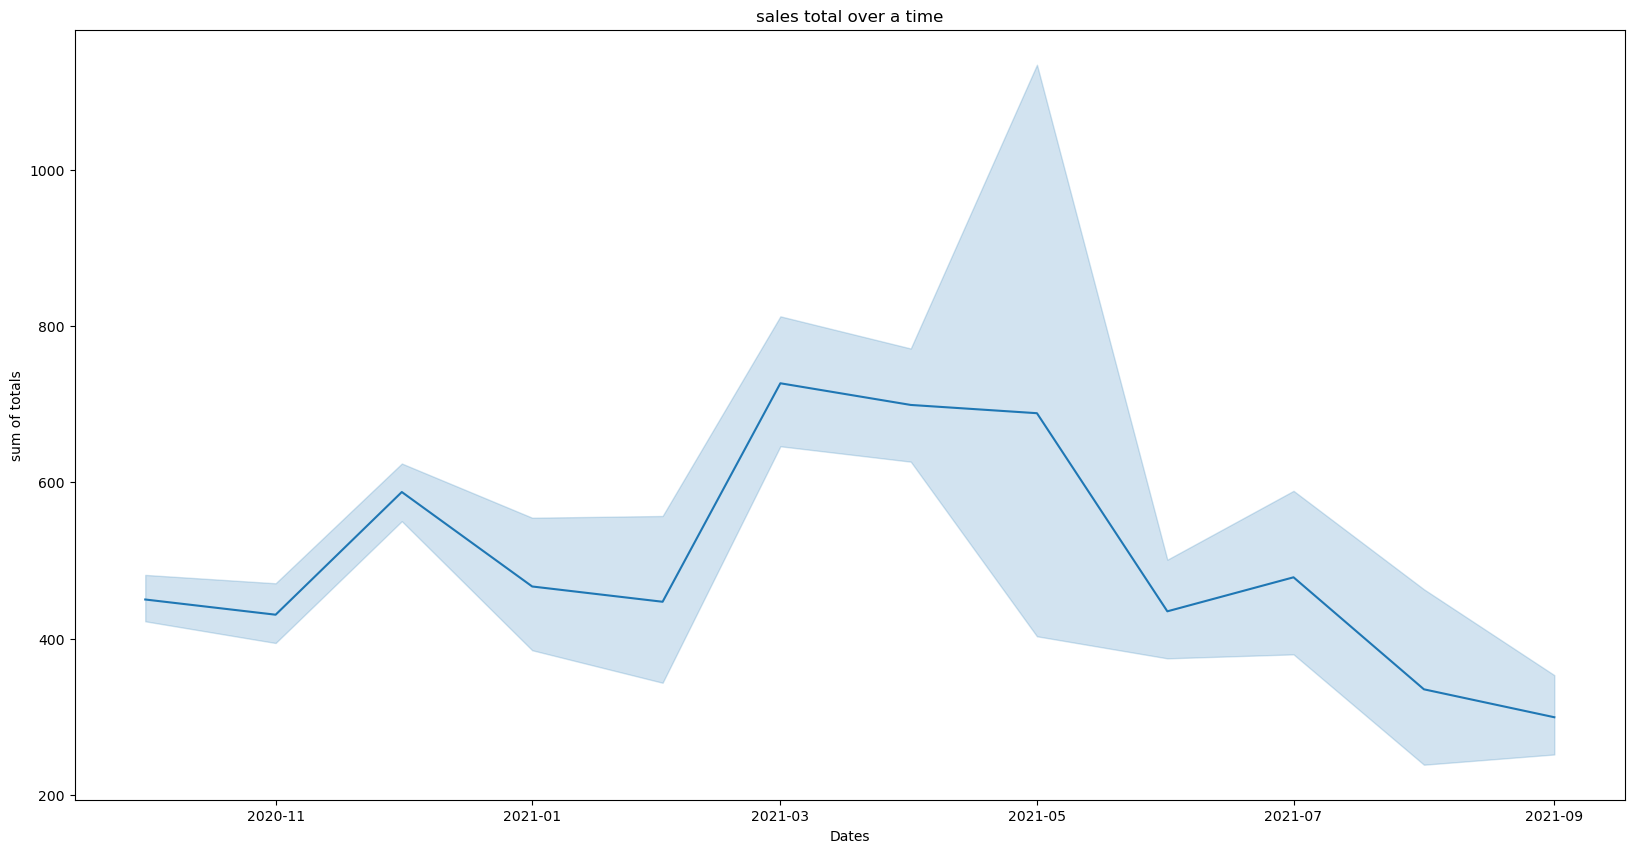

In [161]:
plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.ylabel('sum of totals')
plt.title('sales total over a time')
sns.lineplot(data_sort,x='dates',y='total');

In the month between 2021-03 to 2021-05 most number of sales;

In [19]:
sales['State'].unique()

array(['OK', 'FL', 'ND', 'HI', 'WY', 'GA', 'TN', 'RI', 'IL', 'KY', 'AZ',
       'AR', 'MS', 'NE', 'NJ', 'WV', 'CA', 'MO', 'LA', 'TX', 'MI', 'PA',
       'VA', 'MN', 'MT', 'ME', 'NM', 'IA', 'OH', 'SC', 'NC', 'UT', 'IN',
       'AL', 'VT', 'NY', 'SD', 'CT', 'OR', 'NH', 'CO', 'DC', 'MD', 'ID',
       'KS', 'NV', 'AK', 'WA', 'MA', 'WI', 'DE'], dtype=object)

In [20]:
states_avg =sales.groupby('State').total.mean()
states_avg.reset_index()

,State,total
0,AK,445.731207
1,AL,352.886750
2,AR,473.605810
3,AZ,587.854306
4,CA,661.052010
5,CO,439.915337
6,CT,243.123345
7,DC,195.957726
8,DE,734.703600
9,FL,523.317998


In [21]:
px.bar(states_avg,title="sales for states")

RI state which has most number of sales.

In [22]:
sales.payment_method.unique()

array(['cod', 'Payaxis', 'Easypay', 'jazzwallet', 'Easypay_MA',
       'jazzvoucher', 'easypay_voucher', 'customercredit', 'bankalfalah',
       'apg', 'mcblite', 'cashatdoorstep'], dtype=object)

In [23]:
pay_method =sales.groupby('payment_method').total.sum()
pay_method=pay_method.reset_index()
pay_method.sort_values('total',ascending=False)

,payment_method,total
6,cod,2.730423e+06
2,Payaxis,1.758465e+06
0,Easypay,1.550267e+06
8,easypay_voucher,8.311135e+05
9,jazzvoucher,2.301176e+05
4,bankalfalah,2.077083e+05
1,Easypay_MA,1.808765e+05
7,customercredit,1.426571e+05
10,jazzwallet,6.633986e+04
3,apg,2.923316e+04


In [24]:
fig= px.bar(pay_method , x='payment_method',y='total', barmode="group",)
fig.show()

COD is the payment type which is used most

In [25]:
pd.crosstab(sales.Gender,sales.category)

category,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion
Gender,,,,,,,,,,,,,,,
F,531,608,16,152,333,184,361,132,1060,1520,46,34,520,626,961
M,881,594,21,174,308,277,359,176,1232,1396,387,37,378,614,1401


In [26]:
sales1 = sales.query('qty_ordered >= 20')

px.bar(sales1 , x=sales1['age'],y=sales1['qty_ordered'],color=sales1['qty_ordered'])


There are so many orders in this dataset we only want to know that which age category people purchesed more than 20 items;

In [27]:
sales['Gender'].value_counts()

M    8235
F    7084
Name: Gender, dtype: int64

In [28]:
px.treemap(sales,path=[px.Constant('Gender'),'category','Gender','age'],values='total',title='Age & Gender purchesed most in categorys')

In [29]:
sales['category'].iplot(kind='hist',title='Most purchesed category')

In [30]:
import plotly.express
plotly.express.pie(sales ,names='status',values='total',title='Status of Total Sales',hole=.3)

In [31]:
sales.total.iplot(kind='scatter',title='Total Sales Distribution')

In [32]:
# plt.scatter(sales.total,)

In [33]:
# sales.drop(sales[sales['discount_amount'] == 0].index,inplace=True)
sales = sales[(sales['status']=='complete')]
# sales.drop(sales[(sales['total'] >= 0) & (sales['total'] < 0.1)].index, inplace=True)
sales.drop(sales[sales['total'] >15000].index,inplace=True)
sales.drop(sales[sales['Discount_Percent'] == 0].index,inplace=True)

In [34]:
sales.head()

,status,qty_ordered,price,value,total,category,payment_method,Gender,age,County,City,State,Zip,Region,Discount_Percent,Date
24,complete,3,254.8,509.6,407.68,Appliances,Easypay,M,28,Bradford,Graham,FL,32042,South,20.0,2020-Dec-1
25,complete,3,315.5,631.0,504.80,Appliances,Easypay,M,28,Bradford,Graham,FL,32042,South,20.0,2020-Dec-1
26,complete,3,69.8,139.6,111.68,Home & Living,Easypay,M,28,Bradford,Graham,FL,32042,South,20.0,2020-Dec-1
27,complete,3,499.8,999.6,799.68,Home & Living,Easypay,M,28,Bradford,Graham,FL,32042,South,20.0,2020-Dec-1
135,complete,2,24.9,24.9,22.41,Men's Fashion,Easypay_MA,F,38,Maricopa,Phoenix,AZ,85015,West,10.0,2020-Dec-1


In [35]:
sales.total.iplot(kind='scatter',title='Total Sales Distribution after analysis')

In the above case we only want complete orders for finding the sales

We drop all the total sales above 15000 because after analysing data most of sales are not more than 10000

# DATA CLEANING

In [36]:
unique_val=list(sales.select_dtypes(include='object').columns)
unique_val

['status',
 'category',
 'payment_method',
 'Gender',
 'County',
 'City',
 'State',
 'Region',
 'Date']

In [37]:
sales.status.unique()

array(['complete'], dtype=object)

In [38]:
sales.category.unique()

array(['Appliances', 'Home & Living', "Men's Fashion", 'Health & Sports',
       "Women's Fashion", 'Mobiles & Tablets', 'Entertainment',
       'Superstore', 'Beauty & Grooming', 'Soghaat', 'Computing',
       'Kids & Baby', 'School & Education', 'Books'], dtype=object)

In [39]:
uniq=[]
for i in unique_val:
    uniq.append(sales[i].unique())

In [40]:
list(uniq)

[array(['complete'], dtype=object),
 array(['Appliances', 'Home & Living', "Men's Fashion", 'Health & Sports',
        "Women's Fashion", 'Mobiles & Tablets', 'Entertainment',
        'Superstore', 'Beauty & Grooming', 'Soghaat', 'Computing',
        'Kids & Baby', 'School & Education', 'Books'], dtype=object),
 array(['Easypay', 'Easypay_MA', 'jazzwallet', 'easypay_voucher', 'cod',
        'Payaxis', 'customercredit', 'jazzvoucher', 'bankalfalah'],
       dtype=object),
 array(['M', 'F'], dtype=object),
 array(['Bradford', 'Maricopa', 'Sunflower', 'Calcasieu', 'Beaverhead',
        'Tulare', 'Clay', 'Salt Lake', 'El Paso', 'Beaufort', 'Corson',
        'Claiborne', 'McHenry', 'Ozark', 'Charlotte', 'Berrien', 'Wright',
        'Adams', 'Auglaize', 'Montgomery', 'Cape May', 'Honolulu',
        'Champaign', 'Wayne', 'Johnson', 'Onondaga', 'Monmouth',
        'Cherokee', 'Grayson', 'Chautauqua', 'Polk', 'Scioto',
        'Lewis and Clark', 'Stafford', 'Los Angeles', 'Ada', 'Baker',
      

In [41]:
nuniq=[]
for i in unique_val:
    nuniq.append(sales[i].nunique())

In [42]:
nuniq

[1, 14, 9, 2, 232, 275, 47, 4, 9]

In [43]:
df=pd.DataFrame()
df['columns']=unique_val
df['unique_value']=nuniq
df

,columns,unique_value
0,status,1
1,category,14
2,payment_method,9
3,Gender,2
4,County,232
5,City,275
6,State,47
7,Region,4
8,Date,9


In [44]:
sales.status.replace({'received':12, 'complete':4, 'order_refunded':8, 'canceled':7, 'refund':9,
        'cod':10, 'paid':3, 'processing':2, 'closed':5, 'pending':0, 'pending_paypal':1,
        'payment_review':11, 'holded':6},inplace=True)

sales.category.replace({"Men's Fashion":7, 'Mobiles & Tablets':2, 'Computing':3, 'Appliances':4,
       'Home & Living':5, "Women's Fashion":8, 'Health & Sports':9,
       'Beauty & Grooming':10, 'Superstore':1, 'Others':15, 'Entertainment':5,
       'Soghaat':11, 'Kids & Baby':12, 'Books':13, 'School & Education':14},inplace=True)

sales.payment_method.replace({'cod': 0, 'Payaxis': 2, 'Easypay': 2, 'jazzwallet': 3, 'Easypay_MA': 4,
                 'jazzvoucher': 5, 'easypay_voucher': 5, 'customercredit': 6, 'bankalfalah': 7,
                 'apg': 8, 'mcblite': 9, 'cashatdoorstep': 1, 'financesettlement': 10},inplace=True)



sales.Region.replace({'Northeast': 1,'Midwest': 2,'South': 3,'West': 4},inplace=True)

In [45]:
# def replace(value):
#     if value=='Gross':
#         return 0
#     elif value=='Net':
#         return 1
#     else:
#         return 2

In [46]:
# sales.bi_st = sales.bi_st.apply(replace)

In [47]:
def replace_(col):
    if col =='M':
        return 0
    else:
        return 1

In [48]:
sales.Gender = sales.Gender.apply(replace_)

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [50]:
sales[sales.select_dtypes(include='object').columns] = sales[sales.select_dtypes(include='object').columns].apply(label_encoder.fit_transform)

In [51]:
sales.head()

,status,qty_ordered,price,value,total,category,payment_method,Gender,age,County,City,State,Zip,Region,Discount_Percent,Date
24,4,3,254.8,509.6,407.68,4,2,0,28,27,97,9,32042,3,20.0,0
25,4,3,315.5,631.0,504.80,4,2,0,28,27,97,9,32042,3,20.0,0
26,4,3,69.8,139.6,111.68,5,2,0,28,27,97,9,32042,3,20.0,0
27,4,3,499.8,999.6,799.68,5,2,0,28,27,97,9,32042,3,20.0,0
135,4,2,24.9,24.9,22.41,7,4,1,38,129,179,3,85015,4,10.0,0


In [52]:
sales.select_dtypes(include ='object').columns

Index([], dtype='object')

# Feature selection

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sales_corr=sales.corr()

<Axes: >

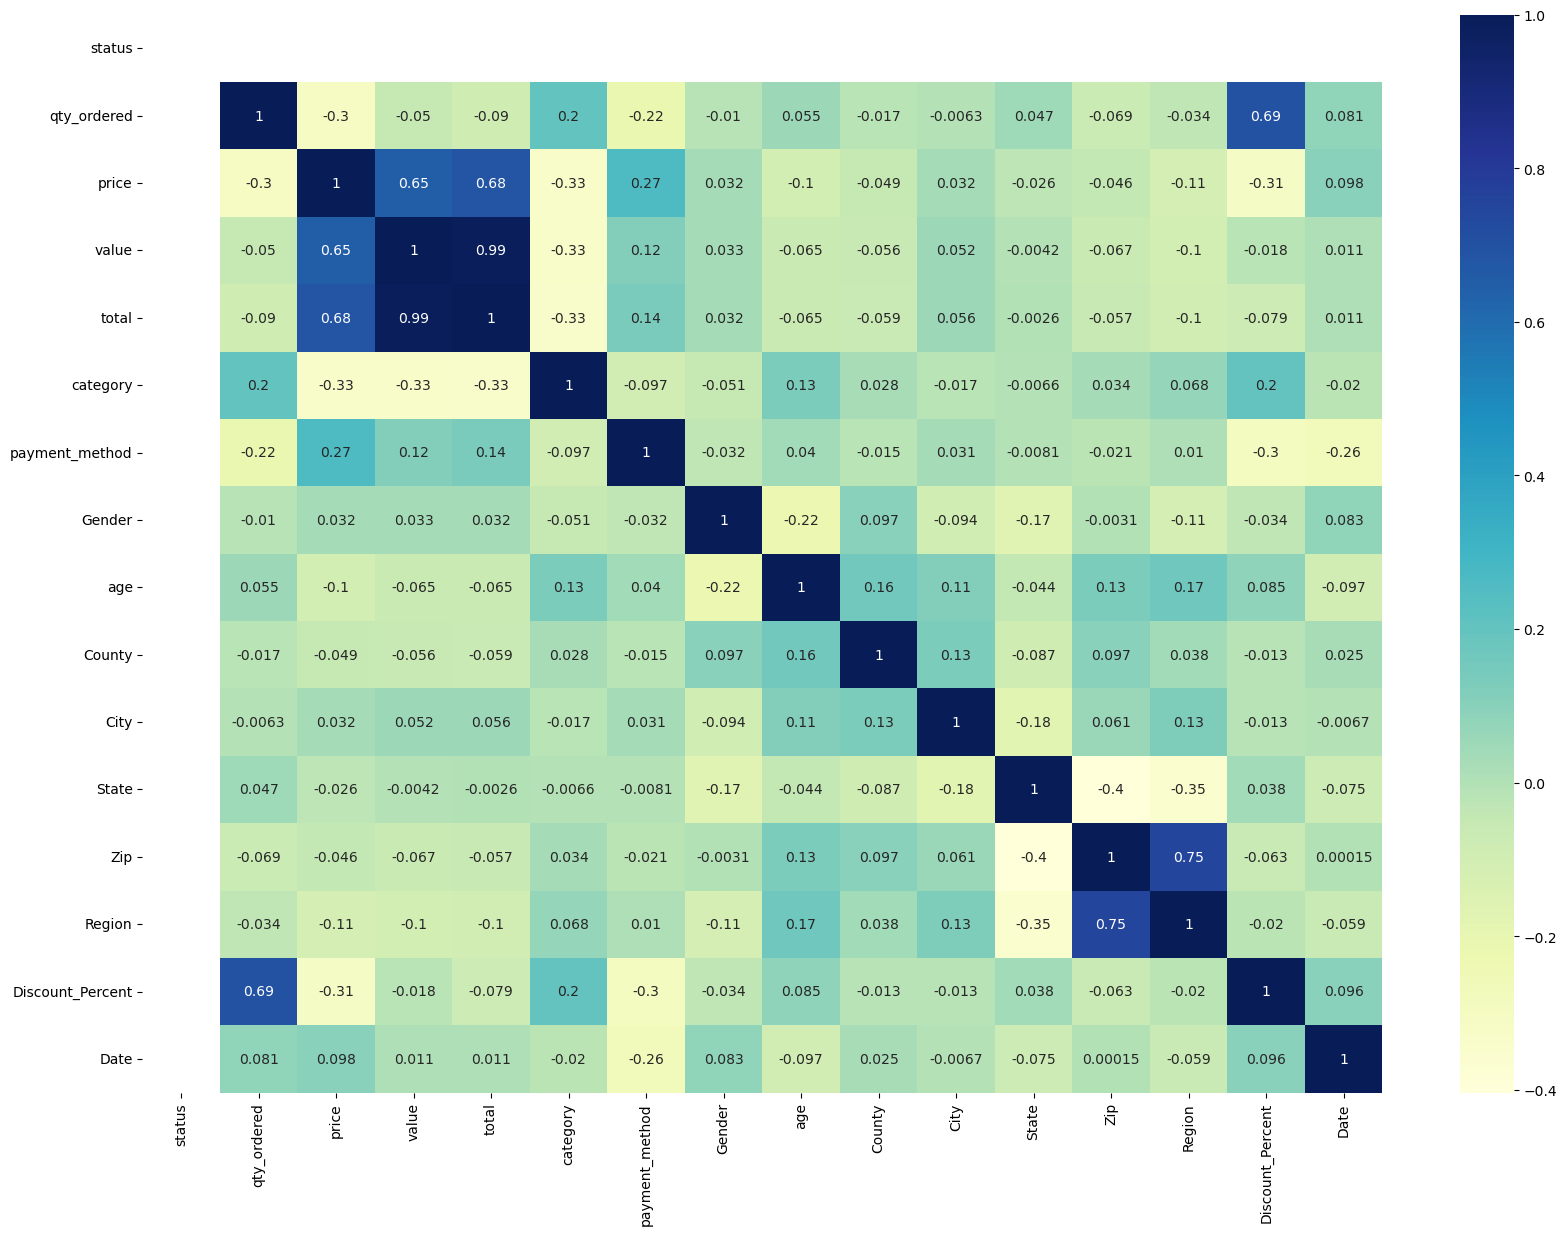

In [55]:
plt.figure(figsize=(20,14))
sns.heatmap(sales_corr,annot=True,cmap="YlGnBu")

In [56]:
x_sales = sales.iloc[::,sales.columns!= 'total']
y_sales = sales.total

x_sales.columns

corr_value =[]
for i in x_sales.columns:
    corr = sales[i].corr(y_sales)
    corr_value.append(corr)

In [57]:
corr_ = pd.DataFrame()
corr_['columns']=x_sales.columns
corr_['values']=corr_value
corr_

feature_imp = corr_[(corr_['values'] <=-0.2) | (corr_['values']>= 0.2)]

In [58]:
feature_imp 

,columns,values
2,price,0.683492
3,value,0.992460
4,category,-0.334718


In [59]:
sales.head()

,status,qty_ordered,price,value,total,category,payment_method,Gender,age,County,City,State,Zip,Region,Discount_Percent,Date
24,4,3,254.8,509.6,407.68,4,2,0,28,27,97,9,32042,3,20.0,0
25,4,3,315.5,631.0,504.80,4,2,0,28,27,97,9,32042,3,20.0,0
26,4,3,69.8,139.6,111.68,5,2,0,28,27,97,9,32042,3,20.0,0
27,4,3,499.8,999.6,799.68,5,2,0,28,27,97,9,32042,3,20.0,0
135,4,2,24.9,24.9,22.41,7,4,1,38,129,179,3,85015,4,10.0,0


In [60]:
# sales =sales.loc[::,['price','value','category','payment_method','Discount_Percent','total']]
sales =sales.loc[::,['price','value','category','total']]

In [61]:
sales.head()

,price,value,category,total
24,254.8,509.6,4,407.68
25,315.5,631.0,4,504.80
26,69.8,139.6,5,111.68
27,499.8,999.6,5,799.68
135,24.9,24.9,7,22.41


In [62]:
sales.shape

(1977, 4)

# Statistics 

In [63]:
sales.head()

,price,value,category,total
24,254.8,509.6,4,407.68
25,315.5,631.0,4,504.80
26,69.8,139.6,5,111.68
27,499.8,999.6,5,799.68
135,24.9,24.9,7,22.41


In [64]:
print("stats with outliers")
sales.describe()

stats with outliers


,price,value,category,total
count,1977.000000,1977.000000,1977.000000,1977.000000
mean,1005.143942,991.495310,4.368235,811.857682
std,1317.778163,1301.950046,2.907126,1078.001886
min,2.700000,0.000000,1.000000,0.000000
25%,79.500000,86.800000,2.000000,66.000000
50%,593.500000,510.000000,4.000000,407.680000
75%,1400.000000,1400.000000,7.000000,1170.000000
max,9604.200000,9583.300000,14.000000,8624.970000


In [65]:
print("stats with outliers")
print(sales['total'].kurtosis()+3)

stats with outliers
14.36670016710427


In [66]:
print("stats with outliers")
print(sales['total'].skew())

stats with outliers
2.7662771006177658


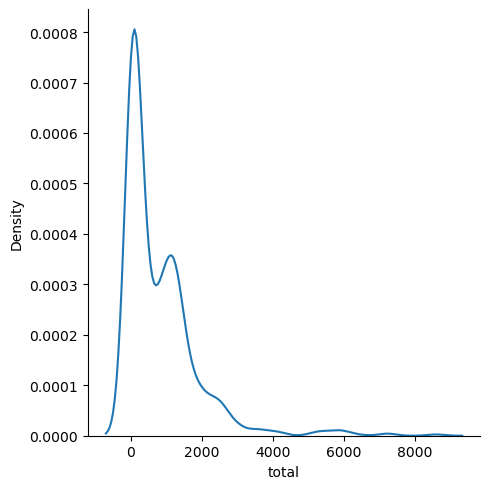

In [67]:
sns.displot(sales.total,kind='kde')

In [68]:
px.box(x=sales.total)

In [69]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if x < mean + k * sd]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == > ", df.shape[0]-df1.shape[0]) 

In [70]:
remove_outliers(sales,'total',1)

(1767, 4)
Number of outliers removed == >  210


In [71]:
sales = df1

In [72]:
# remove_outliers(pp,'Sale_Price',2)

In [73]:
px.box(x=sales.total)

After removing all the outliers from the data;

In [74]:
print("stats without outliers")
sales.describe()

stats without outliers


,price,value,category,total
count,1767.000000,1767.000000,1767.000000,1767.000000
mean,769.527546,652.324633,4.525184,532.316881
std,1018.894317,666.330638,3.003643,552.759665
min,2.700000,0.000000,1.000000,0.000000
25%,67.000000,69.900000,2.000000,54.040000
50%,452.500000,336.000000,4.000000,229.207800
75%,1314.400000,1278.900000,7.000000,1087.065000
max,9604.200000,2597.800000,14.000000,1887.500000


In [75]:
print("stats without outliers")
print(sales['total'].kurtosis()+3)

stats without outliers
2.0752391538366926


In [76]:
print("stats without outliers")
print(sales['total'].skew())

stats without outliers
0.6993198701843605


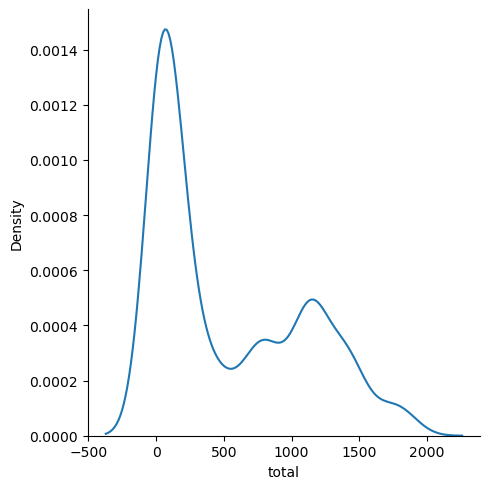

In [77]:
sns.displot(sales.total,kind='kde')

# Model Selection

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
sales_train  , sales_test = train_test_split(sales , test_size=.2)

x_sales_train = sales_train.iloc[::,sales.columns!='total']
y_sales_train = sales_train.total


x_sales_test = sales_test.iloc[::,sales.columns!='total']
y_sales_test = sales_test.total

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc_x_train = sc.fit_transform(x_sales_train)
sc_x_test = sc.transform(x_sales_test)

In [81]:
print(sc_x_train.shape)
print(y_sales_train.shape)

(1413, 3)
(1413,)


In [82]:
print(sc_x_test.shape)
print(y_sales_test.shape)

(354, 3)
(354,)


In [83]:
print(sc_x_train)

[[-0.40250466 -0.4447092   0.1437277 ]
 [-0.71074193 -0.90003429 -0.19029736]
 [-0.74115875 -0.91491125  1.14580288]
 ...
 [-0.03668906  1.16636022 -0.85834749]
 [ 0.53950101  0.94681237 -0.85834749]
 [-0.6598777  -0.6747761   0.81177782]]


In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [85]:
reg.fit(sc_x_train,y_sales_train)

LinearRegression()

In [86]:
R_sq_train=reg.score(sc_x_train,y_sales_train)
R_sq_train

0.981811790252131

In [87]:
K=sc_x_train.shape[1]
N=sc_x_train.shape[0]

Adj_rsq_train=1-(1-R_sq_train)*(N-1)/(N-K-1)
Adj_rsq_train

0.9817730644684236

In [88]:
R_sq_test=reg.score(sc_x_test,y_sales_test)
R_sq_test

0.9895553028532188

In [89]:
K=sc_x_test.shape[1]
N=sc_x_test.shape[0]

Adj_rsq_test=1-(1-R_sq_test)*(N-1)/(N-K-1)
Adj_rsq_test

0.989465776877675

In [90]:
pred_train = reg.predict(sc_x_train)

pred_test = reg.predict(sc_x_test)

In [91]:
reg.coef_

array([ 15.92130229, 535.93651973,  -8.27802346])

In [92]:
reg.intercept_

528.4478874805378

In [93]:
error_train= y_sales_train - pred_train
error_train 

5750      35.096193
5450       4.064011
7690      15.171660
7567      60.403660
7669      10.255297
            ...    
10606     94.880706
7267      18.934807
9080    -135.064206
4498      35.490804
9997      10.255297
Name: total, Length: 1413, dtype: float64

In [94]:
error_test = y_sales_test - pred_test
error_test 

6358      -3.965719
3198      -1.646272
5474      -2.446470
5749      -1.065193
7260      39.994996
            ...    
4770    -150.735415
5539     -16.442813
6889     -17.758367
13718    -29.835370
13931    159.055526
Name: total, Length: 354, dtype: float64

In [95]:
error_train.mean()

-1.3275533067280002e-15

In [96]:
error_test.mean()

2.976919510726489

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,
          1.,   1.,   0.,   1.,   1.,   1.,   3.,   3.,   0.,   6.,   7.,
          0.,  27.,  14.,   8.,  16.,  31.,  36.,  95., 162., 360., 345.,
        136.,  63.,  28.,  23.,   8.,  29.]),
 array([-826.83221414, -807.26854757, -787.70488101, -768.14121444,
        -748.57754788, -729.01388131, -709.45021475, -689.88654818,
        -670.32288162, -650.75921505, -631.19554849, -611.63188192,
        -592.06821536, -572.5045488 , -552.94088223, -533.37721567,
        -513.8135491 , -494.24988254, -474.68621597, -455.12254941,
        -435.55888284, -415.99521628, -396.43154971, -376.86788315,
        -357.30421658, -337.74055002, -318.17688346, -298.61321689,
        -279.04955033, -259.48588376, -239.9222172 , -220.35855063,
        -200.79488407, -181.2312175 , -161.66755094, -142.10388437,
        -122.54021781, -102.97655124,  -83.412

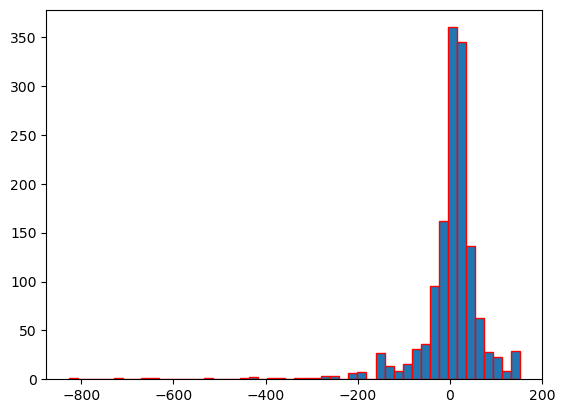

In [97]:
plt.hist(error_train,edgecolor='red',bins=50)

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,
         4.,  2.,  3.,  2.,  2.,  0.,  1.,  2.,  3.,  3.,  3.,  5., 10.,
         4., 10., 23., 12., 45., 24., 39., 45., 25., 23., 11.,  7., 14.,
         2.,  0.,  8.,  4.,  2.,  2.,  1.,  1.,  1.,  2.,  1.]),
 array([-2.59625407e+02, -2.51251788e+02, -2.42878170e+02, -2.34504551e+02,
        -2.26130932e+02, -2.17757314e+02, -2.09383695e+02, -2.01010076e+02,
        -1.92636458e+02, -1.84262839e+02, -1.75889220e+02, -1.67515602e+02,
        -1.59141983e+02, -1.50768364e+02, -1.42394746e+02, -1.34021127e+02,
        -1.25647508e+02, -1.17273890e+02, -1.08900271e+02, -1.00526653e+02,
        -9.21530339e+01, -8.37794152e+01, -7.54057966e+01, -6.70321779e+01,
        -5.86585593e+01, -5.02849406e+01, -4.19113219e+01, -3.35377033e+01,
        -2.51640846e+01, -1.67904660e+01, -8.41684734e+00, -4.32286909e-02,
         8.33038996e+00,  1.67040086e+01,  2.50776273e+01,  3.34512459e+01,
         4.18248646e+01,  5.0198

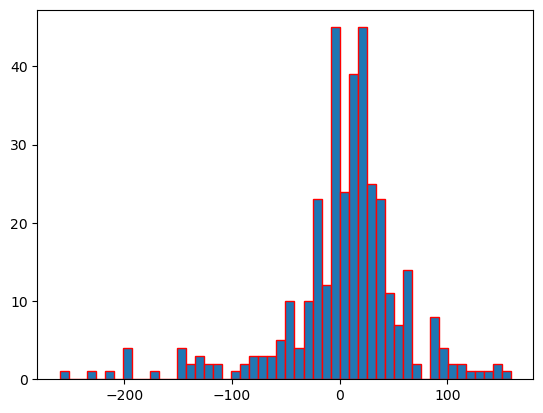

In [98]:
plt.hist(error_test,edgecolor='red',bins=50)

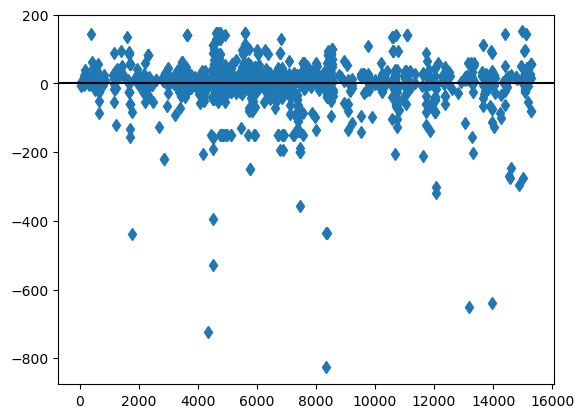

In [99]:
plt.plot(error_train,'d')
plt.axhline(color='black')

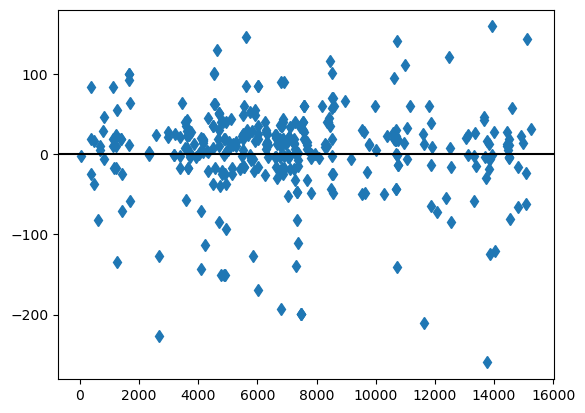

In [100]:
plt.plot(error_test,'d')
plt.axhline(color='black')

In [101]:
pred_act= pd.DataFrame()
pred_act['Actual']=y_sales_train
pred_act['predict']=pred_train
pred_act

,Actual,predict
5750,317.610,282.513807
5450,40.410,36.345989
7690,32.000,16.828340
7567,849.900,789.496340
7669,159.840,149.584703
...,...,...
10606,1411.000,1316.119294
7267,1170.000,1151.065193
9080,1025.000,1160.064206
4498,1087.065,1051.574196


<Axes: xlabel='Actual', ylabel='predict'>

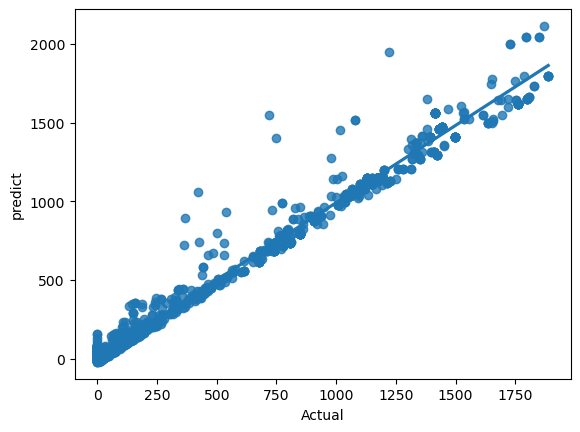

In [102]:
sns.regplot(pred_act,x='Actual',y='predict')

In [103]:
pred_act_test= pd.DataFrame()
pred_act_test['Actual']=y_sales_test
pred_act_test['predict']=pred_test
pred_act_test

,Actual,predict
6358,19.04000,23.005719
3198,48.82800,50.474272
5474,180.00000,182.446470
5749,1150.00000,1151.065193
7260,1149.90000,1109.905004
...,...,...
4770,1411.83000,1562.565415
5539,924.80000,941.242813
6889,1392.92000,1410.678367
13718,0.00000,29.835370


<Axes: xlabel='Actual', ylabel='predict'>

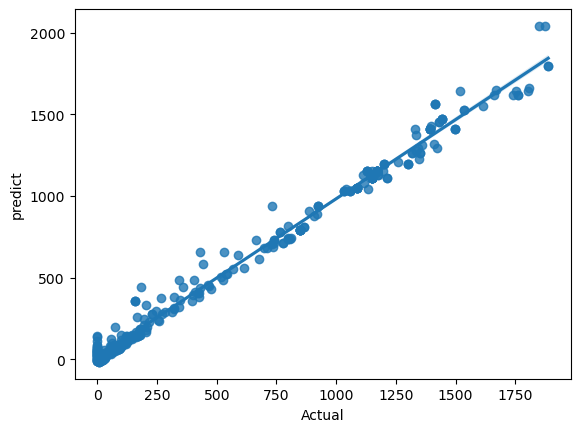

In [104]:
sns.regplot(pred_act_test,x='Actual',y='predict')

In [105]:
mse_train = np.mean(np.square(error_train))
mse_train

5508.006767941053

In [106]:
mse_test = np.mean(np.square(error_test))
mse_test

3292.1294209402304

In [107]:
rmse_train = np.sqrt(np.mean(np.square(error_train)))
rmse_train

74.21594685740426

In [108]:
rmse_test = np.sqrt(np.mean(np.square(error_test)))
rmse_test

57.377080972634275

In [109]:
mape_train = np.mean(np.abs(error_train))
mape_train

41.048819108842025

In [110]:
Acc = 100 - mape_train
Acc

58.951180891157975

In [111]:
mape_test = np.mean(np.abs(error_test))
mape_test

38.39798847382839

In [112]:
Acc = 100 - mape_test
Acc

61.60201152617161

After using Linear Regression its giving very low accuracy;

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
RR= RandomForestRegressor(n_estimators=80)

In [116]:
RR.fit(sc_x_train,y_sales_train)

RandomForestRegressor(n_estimators=80)

In [117]:
R_sq_RR =RR.score(sc_x_train , y_sales_train)
R_sq_RR

0.9991101704116387

In [118]:
K=sc_x_train.shape[1]
N=sc_x_train.shape[0]

Adj_rsq_test=1-(1-R_sq_RR)*(N-1)/(N-K-1)
Adj_rsq_test

0.9991082758135088

In [119]:
pred_train_rr = RR.predict(sc_x_train)

pred_test_rr = RR.predict(sc_x_test)

In [120]:
error_train_rr = y_sales_train - pred_train_rr

error_test_rr = y_sales_test - pred_test_rr

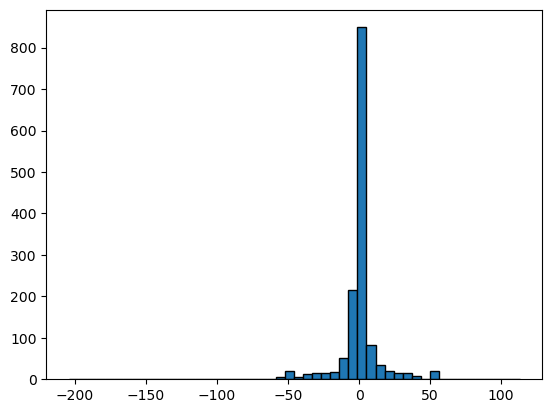

In [121]:
plt.hist(error_train_rr,edgecolor='black',bins=50);

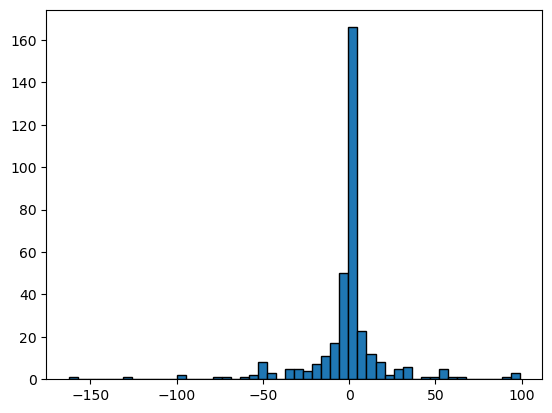

In [122]:
plt.hist(error_test_rr ,edgecolor='black',bins=50);

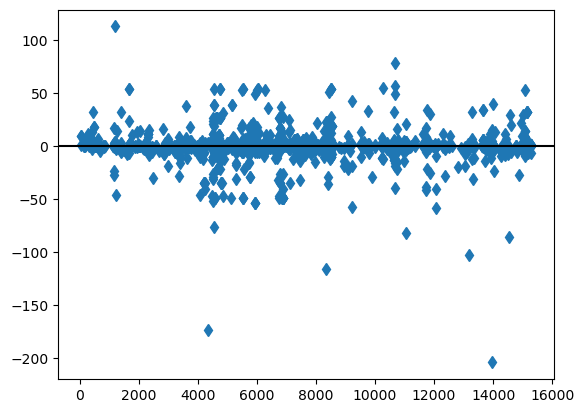

In [123]:
plt.plot(error_train_rr,'d')
plt.axhline(color='black')

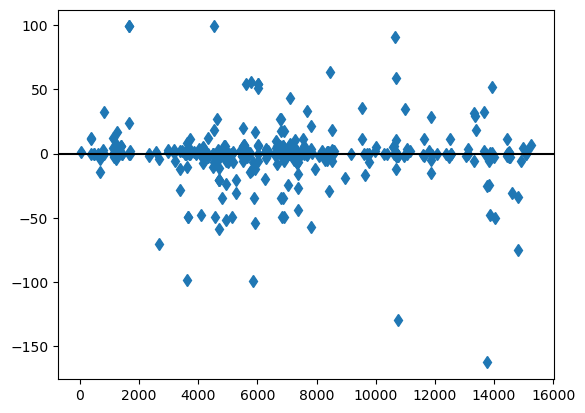

In [124]:
plt.plot(error_test_rr,'d')
plt.axhline(color='black')

In [125]:
pred_act= pd.DataFrame()
pred_act['Actual']=y_sales_train
pred_act['predict']=pred_train_rr
pred_act

,Actual,predict
5750,317.610,307.564705
5450,40.410,41.516428
7690,32.000,32.000000
7567,849.900,848.041611
7669,159.840,158.809928
...,...,...
10606,1411.000,1411.000000
7267,1170.000,1164.381756
9080,1025.000,1015.281625
4498,1087.065,1087.065000


<Axes: xlabel='Actual', ylabel='predict'>

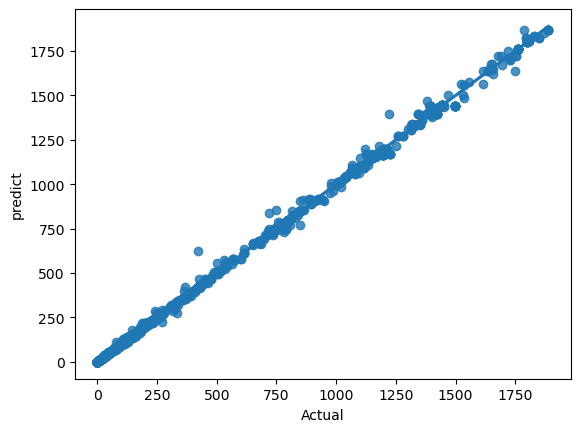

In [126]:
sns.regplot(pred_act,x='Actual',y='predict')

In [127]:
pred_act_test= pd.DataFrame()
pred_act_test['Actual']=y_sales_test
pred_act_test['predict']=pred_test_rr
pred_act_test

,Actual,predict
6358,19.04000,19.138687
3198,48.82800,46.224771
5474,180.00000,181.448451
5749,1150.00000,1164.381756
7260,1149.90000,1148.810786
...,...,...
4770,1411.83000,1411.830000
5539,924.80000,917.749491
6889,1392.92000,1442.138530
13718,0.00000,0.000000


<Axes: xlabel='Actual', ylabel='predict'>

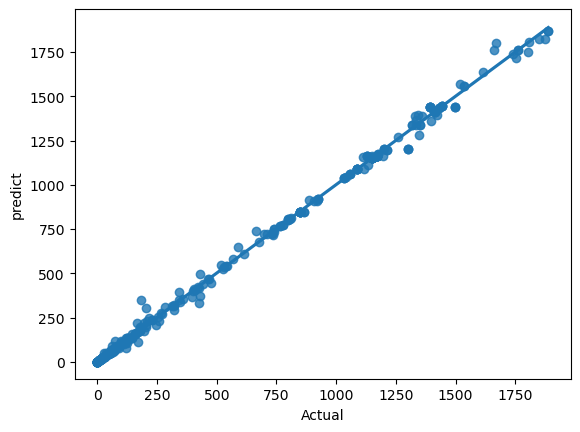

In [128]:
sns.regplot(pred_act_test,x='Actual',y='predict')

In [129]:
mse_train = np.mean(np.square(error_train_rr))
mse_train

269.4705780805263

In [130]:
rmse_train = np.sqrt(np.mean(np.square(error_train_rr)))
rmse_train

16.415559024307587

In [131]:
mse_train = np.mean(np.square(error_test_rr))
mse_train

588.6637209117258

In [132]:
rmse_train = np.sqrt(np.mean(np.square(error_test_rr)))
rmse_train

24.262393140655476

In [133]:
mape_train = np.mean(np.abs(error_train_rr))
mape_train

6.974509705991976

In [134]:
mape_test = np.mean(np.abs(error_test_rr))
mape_test

11.628291170560434

In [135]:
Acc = 100 - mape_train
Acc

93.02549029400802

In [136]:
Acc = 100 - mape_test
Acc

88.37170882943957

After using Random Forest its giving 88% of accuracy.

# Decsion Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

In [138]:
dc.fit(sc_x_train , y_sales_train)

DecisionTreeRegressor()

In [139]:
r_sq_dc =dc.score(sc_x_train , y_sales_train)
print(r_sq_dc)

0.9995478749738528


In [140]:
N = sc_x_train.shape[0]
K = sc_x_train.shape[1]

adj_r_sq = 1-(1- r_sq_dc)*(N-1)/(N-K-1)
print(adj_r_sq)

0.9995469123229809


In [141]:
test_r_sq_dc =dc.score(sc_x_test, y_sales_test)
print(r_sq_dc)

0.9995478749738528


In [142]:
N = sc_x_test.shape[0]
K = sc_x_test.shape[1]

adj_r_sq = 1-(1- test_r_sq_dc)*(N-1)/(N-K-1)
print(adj_r_sq)

0.998020464707692


In [143]:
pred_train_dc = dc.predict(sc_x_train)

pred_test_dc = dc.predict(sc_x_test)

In [144]:
error_train_dc = y_sales_train - pred_train_dc

error_test_dc = y_sales_test - pred_test_dc

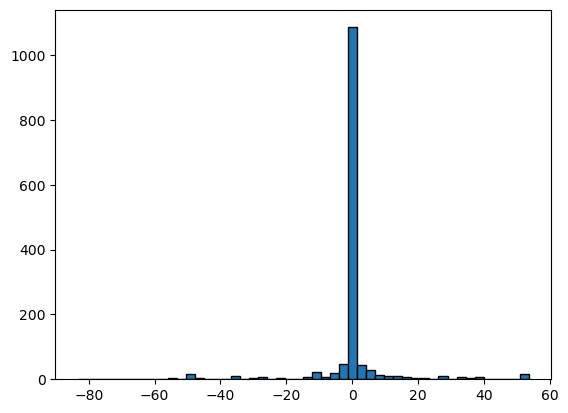

In [145]:
plt.hist(error_train_dc,edgecolor='black',bins=50);

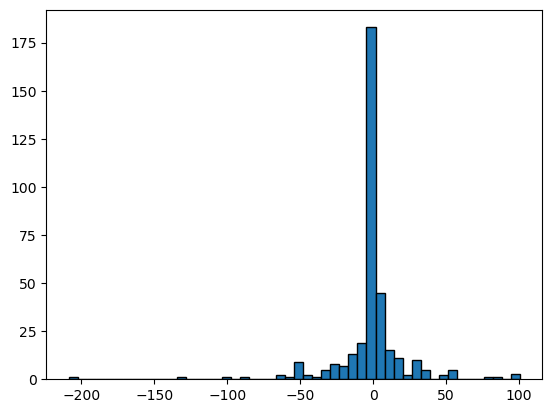

In [146]:
plt.hist(error_test_dc,edgecolor='black',bins=50);

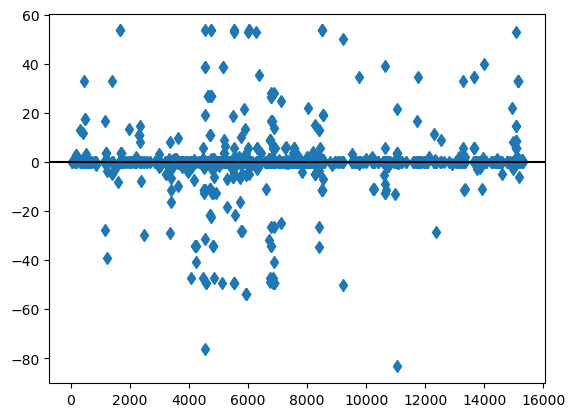

In [147]:
plt.plot(error_train_dc,'d')
plt.axhline(color='black')

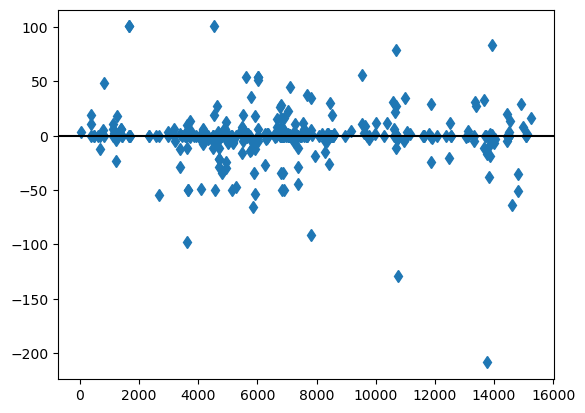

In [148]:
plt.plot(error_test_dc,'d')
plt.axhline(color='black')

In [149]:
pred_act= pd.DataFrame()
pred_act['Actual']=y_sales_train
pred_act['predict']=pred_train_dc
pred_act

,Actual,predict
5750,317.610,307.603333
5450,40.410,41.532500
7690,32.000,32.000000
7567,849.900,847.900882
7669,159.840,158.552857
...,...,...
10606,1411.000,1411.000000
7267,1170.000,1164.188571
9080,1025.000,1025.000000
4498,1087.065,1087.065000


<Axes: xlabel='Actual', ylabel='predict'>

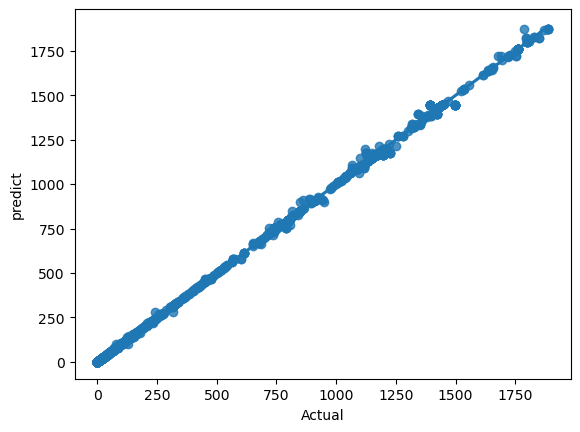

In [150]:
sns.regplot(pred_act,x='Actual',y='predict')

In [151]:
pred_act_t= pd.DataFrame()
pred_act_t['Actual']=y_sales_test
pred_act_t['predict']=pred_test_dc
pred_act_t

,Actual,predict
6358,19.04000,19.200000
3198,48.82800,42.500000
5474,180.00000,172.201000
5749,1150.00000,1164.188571
7260,1149.90000,1148.763636
...,...,...
4770,1411.83000,1411.830000
5539,924.80000,924.800000
6889,1392.92000,1442.398400
13718,0.00000,0.000000


<Axes: xlabel='Actual', ylabel='predict'>

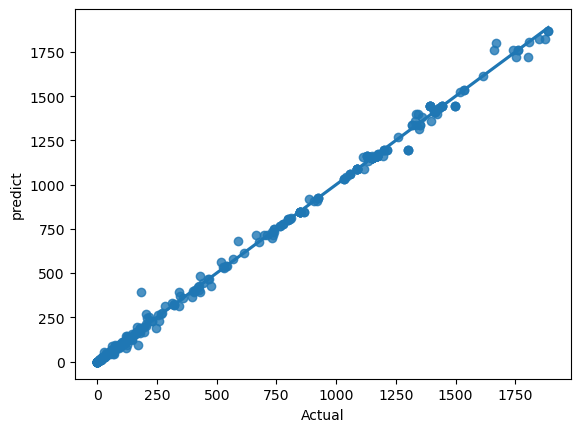

In [152]:
sns.regplot(pred_act_t,x='Actual',y='predict')

In [153]:
mse_train = np.mean(np.square(error_train_dc))
mse_train

136.91879181602553

In [154]:
mse_test = np.mean(np.square(error_test_dc))
mse_test

618.639485790423

In [155]:
rmse_train = np.sqrt(np.mean(np.square(error_train_dc)))
rmse_train

11.70123035479712

In [156]:
rmse_test = np.sqrt(np.mean(np.square(error_test_dc)))
rmse_test

24.872464409270407

In [157]:
mape_train = np.mean(np.abs(error_train_dc))
mape_train

4.047908013831252

In [158]:
mape_test = np.mean(np.abs(error_test_dc))
mape_test

11.442099244070107

In [159]:
Acc = 100 - mape_train
Acc

95.95209198616875

In [160]:
Acc = 100 - mape_test
Acc

88.5579007559299